# 1. Medida
É o mapeamento de um atributo de uma entidade, esses dados podem ser classificados em:

## 1.1 Qualitativa (nonmetric)

### 1.1.1 Categórico (nominal): Classificatório

OBS: Analisar a frequência das categorias faz sentido.

In [1]:
mulher = 0
homem = 1

windows = 1
linux = 2

### 1.1.2 Ordinal (podem ser ordenados)

In [2]:
excelente = 5
muito_bom = 4
bom = 3
razoavel = 2
ruim = 1

## 1.2 Quantitativa (metric)

### 1.2.1 Intervalar
Diferença entre 2 pontos em qualquer parte da escala são iguais:
- EX: escala de Celsius e Fahrenheit
- Não podemos realizar multiplicação e divisão
- Usa zero arbitrário (que é diferente de zero absoluto)
 - Ou seja, o zero não corresponde a inexistência da medida.


In [3]:
temperatura_graus_celsius = 5
temperatura_graus_fahrenheit = 41

### 1.2.2 Escala de razão (ratio)
        Idêntica a Intervalar, mas com zero absoluto (zero representa a inexistência da unidade da medida)
        Ex: Número de filhos, tempo de vida, número de bug por linha de código, custo, etc.

In [4]:
numero_de_filhos = 3
tempo_de_vida_em_anos = 32
numero_de_bugs = 0
custo_em_reais = 997

# 2. Interpretação Quantitativa (Etapas)

1. Dados
2. Estatística Descritiva
3. Redução do conjunto de dados
4. Teste de hipótese
5. Conclusões

## Amostra x População

**Situação comum**:	características da população não são conhecidas. Queremos estimar essas características	a partir das	amostras.

**Estatística** e **probabilidade**	são	usadas para	definir quanta **incerteza aleatória** há em **nossas observações**.

In [5]:
import pandas as pd

dados_populacao = {'Product': ['ABC','DDD','XYZ','AAA','CCC','PPP','NNN','RRR'],
          'Price': [630,790,250,370,880,1250,550,700],
       'Discount': ['No','Yes','No','Yes','Yes','No','No','Yes']
        }

dados_populacao = pd.DataFrame(dados_populacao, columns = ['Product','Price','Discount'])

print (dados_populacao)
print("\n\n========== Selecione 3 elementos, n = 3 ==========\n\n")

df_amostra_1 = dados_populacao.sample(n=3, replace = False)
print (df_amostra_1)

print("\n\n========== Selecione metade dos elementos do Data Frame, frac = 0.5 ==========\n\n")

df_amostra_2 = dados_populacao.sample(frac = 0.5)
print (df_amostra_2)

  Product  Price Discount
0     ABC    630       No
1     DDD    790      Yes
2     XYZ    250       No
3     AAA    370      Yes
4     CCC    880      Yes
5     PPP   1250       No
6     NNN    550       No
7     RRR    700      Yes


========== Selecione 3 elementos, n = 3 ==========


  Product  Price Discount
6     NNN    550       No
1     DDD    790      Yes
2     XYZ    250       No


========== Selecione metade dos elementos do Data Frame, frac = 0.5 ==========


  Product  Price Discount
1     DDD    790      Yes
6     NNN    550       No
4     CCC    880      Yes
2     XYZ    250       No


# 3. Estatística Descritiva

Usada para sumarizar os dados coletados, para descrever	a distribuição dos seus	dados pelo seu centro, espalhamento e formato.

**Objetivos**:
* Ter noção de como os dados estão distribuídos
* Entender melhor a natureza dos dados	
* Identificar pontos anormais (possíveis outliers)	
* Apresentação gráfica de aspectos importantes dos dados	
* Identificar dependências entre variáveis

## 3.1 Outliers

Valores muito altos ou muito baixos. Precisam ser analisados para decidir se vão ou não ser mantidos.

* **Erro comum**: ignorar os outliers.

### 3.1.1 Percentis e Quartis: 
- 0%, 1%, 2% ... 100%
 - Ordena as medidas e divide a amostra em 100 partes, cada porcentagem do percentil acessa ao valor correspondente a esse índice dos dados analisados.
- Q1: Quartil 1 = Percentil 25%
- Q2: Quartil 2 = Percentil 50% (Mediana)
- Q3: Quartil 3 = Percentil 75%

### 3.1.2 Método de Tukey: Regra para encontrar Outliers
* x	< Q1 - 1,5 IQR ou x > Q3 + 1,5 IQR	
* IQR =	Q3 – Q1

### 3.1.3 Boxplot
- O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados.
- Os outliers são exibidos através da fórmula de Tukey (apresentado acima)
- Os dados são ordenados e são apresentados da seguinte forma:
    1. Pontos fora do diagrama de caixa, podem aparecer acima ou abaixo, são os outliers.
    2. Valor máximo (ignorando os outliers)
    3. Q3: Percentil 75% 
    4. Q2: Percentil 50% (Mediana)
    5. Q1: Percentil 25%
    6. Valor mínimo (ignorando os outliers)

In [6]:
#      Q1-1.5IQR   Q1  Mediana  Q3   Q3+1.5IQR
#                   |-----:-----|
#   o      |--------|     :     |--------|    o  o
#                   |-----:-----|
# outlier           <----------->            outliers
#                        IQR

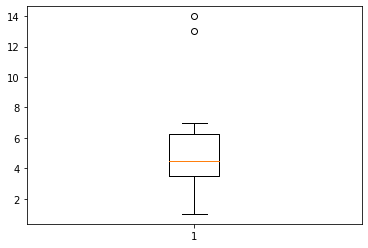

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

valores = [1, 1, 2, 4, 4, 4, 5, 5, 6, 7, 13, 14] 
dados = {'valores':valores}
df = pd.DataFrame(dados)

plt.boxplot(df)
plt.show()

In [8]:
def metodo_de_tukey_retorna_indices_dos_outliers(df, variable):
    # Recebe dois parâmetros: dataframe & variável de interesse como string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    # limites internos
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    # limites externos
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    # return outliers_prob, outliers_poss
    outliers_set = set(outliers_prob + outliers_poss)
    lista_indices_outliers = []
    for i in outliers_set:
        lista_indices_outliers.append(i)
    return(lista_indices_outliers)

outliers = metodo_de_tukey_retorna_indices_dos_outliers(df,"valores")
print("Índices considerados outliers:" + str(outliers))
print("\nData frame sem Outliers:")
print(df.drop(outliers))

Índices considerados outliers:[10, 11]

Data frame sem Outliers:
   valores
0        1
1        1
2        2
3        4
4        4
5        4
6        5
7        5
8        6
9        7


## 3.2 Índices de Tendência Central

Médias são mais sensíveis a Outliers, principalmente com tamanho de conjunto pequeno.

* **Média Aritmética**: Usada para distribuições numéricas normais, que têm uma baixa quantidade de valores discrepantes.
* **Média Geométrica**: Muito utilizada em situações de acumulação de aumento ou decrescimento percentual.
* **Média Harmônica**: Quando trabalhamos com grandezas inversamente proporcionais.
        * Ex: velocidade (+ velocidade - tempo)

Mediana, Percentis e Moda são resistentes a Outliers, mas perdem informações.

* **Mediana**: Geralmente é utilizada para retornar a tendência central para distribuições numéricas distorcidas. Ordena e seleciona o índice do meio (se for ímpar), e a média dos 2 valores centrais (caso seja par).
* **Moda**: Útil quando os valores ou as observações não são numéricos, encontra o valor que possui maior frequência.
        
### Qual métrica utilizar?

Tipo de escala | Índice de Tendência Central
:-|---:
Nominal | Moda
Ordinal | Mediana
Intervalar e Razão | Simétrico: Média
                   | Assimétrico: Mediana
                   

In [9]:
import random
import statistics
 
valores = [ random.randint(1, 100) for x in range(1,1001) ]
media_aritmetica = statistics.mean(valores)
mediana = statistics.median(valores)
print("Média Aritmétrica: %s" % media_aritmetica)
print("Mediana: %s" % mediana)
print("\n========== \n")

categorias = ['homem','homem','homem', 'mulher']
moda = statistics.mode(categorias)
print("Moda: %s" % moda)
print("\n========== \n")

print("Luiz, vai de casa para o trabalho a uma velocidade de 30km/h, na volta, usando o mesmo percurso, devido ao trânsito, faz 20km/h, qual foi sua velocidade média, considerando ida e volta?\n")
velocidades = [30, 20]
media_harmonica = statistics.harmonic_mean(velocidades)
print("Média Hermônica: %s Km/h" % media_harmonica)

print("\n========== \n")
print("Se você investiu por 3 anos, no 1º ano, teve uma valorização de 20%, no 2º ano: 44% e no 3º ano: 33,1%, de quanto foi o rendimento médio anual?\n")
# 100% + rendimento de cada:
retorno_investimento = [120, 144, 133.1]
media_geometrica = statistics.geometric_mean(retorno_investimento)
print("Média Geométrica: %.02f%% é o rendimento médio anual" % (media_geometrica - 100))

Média Aritmétrica: 49.435
Mediana: 48.5


Moda: homem


Luiz, vai de casa para o trabalho a uma velocidade de 30km/h, na volta, usando o mesmo percurso, devido ao trânsito, faz 20km/h, qual foi sua velocidade média, considerando ida e volta?

Média Hermônica: 24.0 Km/h


Se você investiu por 3 anos, no 1º ano, teve uma valorização de 20%, no 2º ano: 44% e no 3º ano: 33,1%, de quanto foi o rendimento médio anual?

Média Geométrica: 32.00% é o rendimento médio anual


## 3.3 Índices de Dispersão (Variabilidade)

- **Range/Intervalo**	(mínimo	e	máximo)	
- **Variância** (quão distante os dados estão da média aritmétrica)
    - A **fórmula muda** em caso dos dados serem de uma **amostra ou da população**.
    - Quanto mais perto de zero, menor essa variação.
- **Desvio padrão** 
    - A **fórmula muda** em caso dos dados serem de uma **amostra ou da população**.
    - Um desvio padrão grande significa que os valores amostrais estão bem distribuídos em torno da média, enquanto que um desvio padrão pequeno indica que eles estão condensados próximos da média. Em poucas palavras, quanto menor o desvio padrão, mais homogênea é a amostra.
    - É a raiz quadrada da variância, o resultado fica na mesma ordem de grandeza da medida analisada.
- **Coeficiente de variação** (CV)
    - Variação dos dados em relação à média aritmética.
    - Como o desvio padrão é a variação em torno da média e trabalha apenas com unidades iguais, o coeficiente de variação trabalha com unidades diferentes e utiliza da porcentagem para conseguir fazer a comparação.
    - Ex: CV do peso de 30 professores de uma universidade e CV da altura de 30 funcionários em uma indústria.
    - Peso e Altura são unidades diferentes, por isso CV se faz necessário, pois por não serem da mesma unidade, não será possível utilizar o desvio padrão para comparar.
    - CV = 100 (para deixar em porcentagem) * (desvio padrão / média aritmética)
    - **CV < 15%**: 
          - Dispersão baixa
          - Dados homogêneos
          - Resultado bem representado pela média aritmética, logo, é melhor para se trabalhar
    - **15% <= CV < 30%**: 
          - Dispersão média
          - Dados neutros
          - Resultado regular em torno da média aritmética
    - **CV >= 30%**: 
          - Dispersão alta
          - Dados heterogênios
          - Resultado péssimo em torno da média aritmética
- **Percentis**: 0%, 1%, 2% ... 100%
    - Ordena as medidas e divide a amostra em 100 partes, cada porcentagem do percentil acessa ao valor correspondente a esse índice dos dados analisados.

In [10]:
import numpy as np 
import statistics as stats
valores = [2, 4, 4, 4, 5, 5, 7, 9] 
media_aritmetica = np.average(valores)
variancia_populacao_np = np.var(valores)
variancia_populacao_statistics = stats.pvariance(valores)
variancia_amostra_statistics = stats.variance(valores)

desvio_padrao_populacao_np = np.std(valores)
desvio_padrao_populacao_statistics = stats.pstdev(valores)
desvio_padrao_amosta_statistics = stats.stdev(valores)


print("Média Aritmétrica: %.2f\n" % media_aritmetica)
print("Variância População (numpy): %.2f" % variancia_populacao_np)
print("Variância População (statistics): %.2f" % variancia_populacao_statistics)
print("Variância Amostra (statistics): %.2f\n" % variancia_amostra_statistics)

print("Desvio Padrão População (numpy): %.2f" % desvio_padrao_populacao_np)
print("Desvio Padrão População (statistics): %.2f" % desvio_padrao_populacao_statistics)
print("Desvio Padrão Amostra (statistics): %.2f\n" % desvio_padrao_amosta_statistics)

print("Percentil min: ", np.percentile(valores, 0))
print("Percentil 25: ", np.percentile(valores, 25))
print("Percentil 50: ", np.percentile(valores, 50))
print("Percentil 75: ", np.percentile(valores, 75))
print("Percentil máx: ", np.percentile(valores, 100))

print("\n========== \n")
import pandas as pd 
df = pd.DataFrame(valores)
print(df.describe())


Média Aritmétrica: 5.00

Variância População (numpy): 4.00
Variância População (statistics): 4.00
Variância Amostra (statistics): 4.57

Desvio Padrão População (numpy): 2.00
Desvio Padrão População (statistics): 2.00
Desvio Padrão Amostra (statistics): 2.14

Percentil min:  2.0
Percentil 25:  4.0
Percentil 50:  4.5
Percentil 75:  5.5
Percentil máx:  9.0


             0
count  8.00000
mean   5.00000
std    2.13809
min    2.00000
25%    4.00000
50%    4.50000
75%    5.50000
max    9.00000


#### 3.4 Skewness: Como os dados estão distribuídos?

- **skewness = 0** : distribuição normal.
 - Mais **elementos próximos à média**.
 - Poucos **elementos distantes da média**
 - Média = Mediana
- **skewness < 0** : Cauda longa para esquerda.
 - Mais **elementos acima da média**.
 - Poucos **elementos muito abaixo da média**
 - Média < Mediana 
 - Média - Mediana = negativo
- **skewness > 0** : Cauda longa para a direita.
 - Mais **elementos abaixo da média**.
 - Poucos **elementos muito acima da média**
 - Média > Mediana 
 - Média - Mediana = positivo
 
#### 3.5 Kurtosis: Grau de achatamento da distribuição
 
- **Kurtosis = 3** : Mesocúrtica, igual a de uma distribuição normal. Nem muito alongada, nem muito achatada.
- **Kurtosis > 3** : Leptocúrtica, mais alongada (pontiaguda) que a de uma distribuição normal.
- **Kurtosis < 3** : Platicúrtica, mais achatada que a de uma distribuição normal.


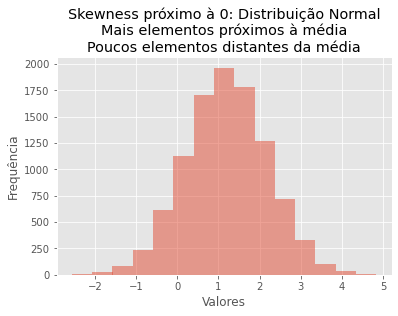

Skewness próximo à 0: Distribuição Normal
Mais elementos próximos à média
Poucos elementos distantes da média
Skewness: -0.00960
Média: 1.19
Mediana: 1.20
Kurtosis: 3.01


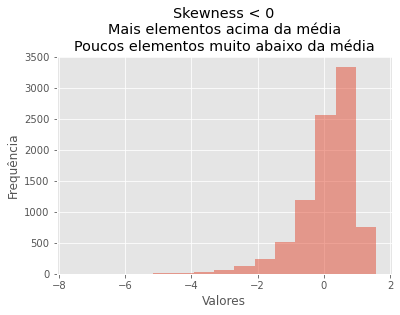

Skewness < 0
Mais elementos acima da média
Poucos elementos muito abaixo da média
Skewness: -1.88350
Média: 0.09
Mediana: 0.29
Kurtosis: 9.02


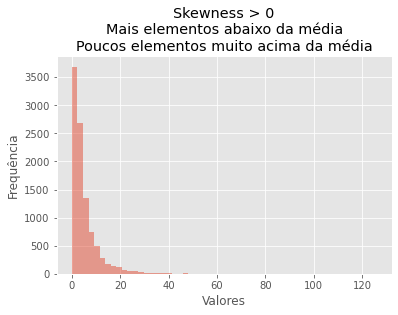

Skewness > 0
Mais elementos abaixo da média
Poucos elementos muito acima da média
Skewness: 4.79365
Média: 5.39
Mediana: 3.31
Kurtosis: 44.47


In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import lognorm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def analises(dados, titulo):
    dados = dados[~np.isnan(dados)]
    print(titulo)
    print("Skewness: %.5f" % (skew(dados)))
    print("Média: %.2f" % np.mean(dados))
    print("Mediana: %.2f" % np.median(dados))
    # fisher = False: cálculo da definição de curtose de Pearson onde o valor de curtose para distribuição normal = 3.
    print("Kurtosis: %.2f" % (kurtosis(dados, fisher = False))) 
    
    
def cria_histograma(titulo, dados, celulas_histograma):
    dados.plot.hist(alpha=0.5, bins=celulas_histograma, grid=True, legend=None)
    plt.xlabel("Valores")
    plt.ylabel("Frequência")
    plt.title(titulo)
    plt.show()
    analises(dados, titulo)
    
media, desvio_padrao = 1.2, 1
dados = np.random.normal(media, desvio_padrao, 10000)

df = pd.DataFrame(dados) # Cria Data Frame para fazer as análises pelo numpy
cria_histograma("Skewness próximo à 0: Distribuição Normal\nMais elementos próximos à média\nPoucos elementos distantes da média", df.iloc[:,0], 15)

df_log = df.apply(np.log)   
cria_histograma("Skewness < 0\nMais elementos acima da média\nPoucos elementos muito abaixo da média", df_log.iloc[:,0], 15)

df_exp = df.apply(np.exp)  
cria_histograma("Skewness > 0\nMais elementos abaixo da média\nPoucos elementos muito acima da média", df_exp.iloc[:,0], 55)


# 4. Análise Exploratória com o menor esforço possível

- Utilize o describe() do Data Frame do pandas
- Crie um relatório através do ProfileReport do pandas_profiling

In [15]:
# Se a versão pandas_profiling estiver com bug, remova ela e instale essa versão estável
# conda uninstall pandas_profiling
# conda install -c conda-forge pandas-profiling=3.1.0

import pandas_profiling
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
target = iris.target 
names = iris.target_names
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

print(df.describe())

relatorio = pandas_profiling.ProfileReport(df)
relatorio

# Caso queira salvar em um arquivo:
# relatorio.to_file("analise_exploratoria_iris.html")

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]